Install GradCAM

In [20]:
!pip install grad-cam

# Load the data

In [21]:
!wget -nc https://ml.gan4x4.ru/msu/dep-1.9/L10/cat_and_dog1.jpg
!wget -nc 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json' imagenet_class_index.json

File ‘cat_and_dog1.jpg’ already there; not retrieving.

File ‘imagenet_class_index.json’ already there; not retrieving.

--2023-11-22 19:59:16--  http://imagenet_class_index.json/
Resolving imagenet_class_index.json (imagenet_class_index.json)... failed: Name or service not known.
wget: unable to resolve host address ‘imagenet_class_index.json’


In [22]:
pil = Image.open('cat_and_dog1.jpg')
input_tensor = pil_to_tensor(pil).float() / 255# Create an input tensor image for your model..
# Note: input_tensor can be a batch tensor with several images!


### Read imagenet Labels

In [23]:
import json

# Opening JSON file
f = open('imagenet_class_index.json')
labels = json.load(f)
print(labels)

{'0': ['n01440764', 'tench'], '1': ['n01443537', 'goldfish'], '2': ['n01484850', 'great_white_shark'], '3': ['n01491361', 'tiger_shark'], '4': ['n01494475', 'hammerhead'], '5': ['n01496331', 'electric_ray'], '6': ['n01498041', 'stingray'], '7': ['n01514668', 'cock'], '8': ['n01514859', 'hen'], '9': ['n01518878', 'ostrich'], '10': ['n01530575', 'brambling'], '11': ['n01531178', 'goldfinch'], '12': ['n01532829', 'house_finch'], '13': ['n01534433', 'junco'], '14': ['n01537544', 'indigo_bunting'], '15': ['n01558993', 'robin'], '16': ['n01560419', 'bulbul'], '17': ['n01580077', 'jay'], '18': ['n01582220', 'magpie'], '19': ['n01592084', 'chickadee'], '20': ['n01601694', 'water_ouzel'], '21': ['n01608432', 'kite'], '22': ['n01614925', 'bald_eagle'], '23': ['n01616318', 'vulture'], '24': ['n01622779', 'great_grey_owl'], '25': ['n01629819', 'European_fire_salamander'], '26': ['n01630670', 'common_newt'], '27': ['n01631663', 'eft'], '28': ['n01632458', 'spotted_salamander'], '29': ['n01632777', 

In [24]:
print(labels['281'])

['n02123045', 'tabby']


#Load resnet 18

In [25]:
from torchvision.models import resnet18
import torchvision

model = resnet18(weights = torchvision.models.ResNet18_Weights)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Apply Gradcam to Resnet18

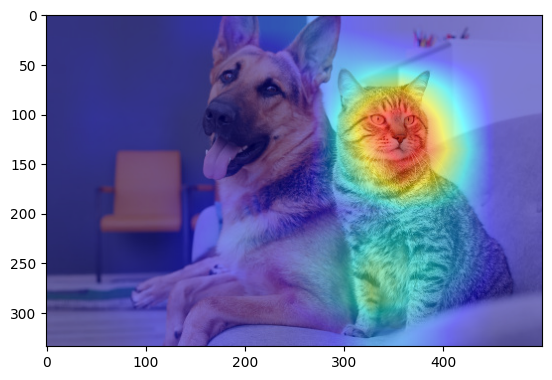

In [26]:
from PIL import Image
from torchvision.transforms.functional import pil_to_tensor
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import numpy as np
import matplotlib.pyplot as plt

def show(pil, grayscale_cam):
  grayscale_cam = grayscale_cam[0, :]
  rgb_image = np.array(pil).astype(float)/255
  visualization = show_cam_on_image(rgb_image, grayscale_cam, use_rgb=True)
  plt.imshow(visualization)
  plt.show()


target_layers = [model.layer4[-1]]
# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=False)
targets = [ClassifierOutputTarget(281)] # 'tabby cat'
grayscale_cam = cam(input_tensor=input_tensor.unsqueeze(0), targets=targets)

show(pil, grayscale_cam)

## Apply Gradcam to Densenet21

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


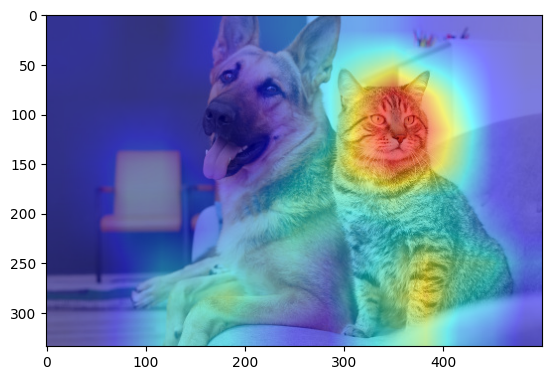

In [27]:
from torchvision.models import  densenet121
model = densenet121(pretrained=True)

target_layers = [model.features[-1]] # Select layer according to doc: https://github.com/jacobgil/pytorch-grad-cam#choosing-the-target-layer

cam = GradCAM(model=model, target_layers=target_layers, use_cuda=False)
targets = [ClassifierOutputTarget(281)] # seleect on of 1000 targets 'tabby cat'


grayscale_cam = cam(input_tensor=input_tensor.unsqueeze(0), targets=targets)
show(pil, grayscale_cam)

## Densenet with modified classifier

In [28]:
print(model.classifier)

Linear(in_features=1024, out_features=1000, bias=True)


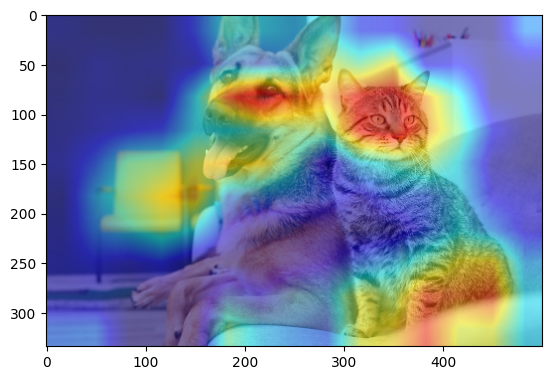

In [29]:
from torch import nn
model.classifier = nn.Linear(in_features=1024, out_features=2, bias=True)
target_layers = [model.features[-1]]

cam = GradCAM(model=model, target_layers=target_layers, use_cuda=False)
targets = [ClassifierOutputTarget(1)]


grayscale_cam = cam(input_tensor=input_tensor.unsqueeze(0), targets=targets)
show(pil, grayscale_cam)
